In [1]:
import pandas as pd
import numpy as np

In [2]:
newData = pd.DataFrame()

In [3]:
VendorSelection = []
import random

for i in range(1000):
    my_random_float = random.random()

    if my_random_float > .5:
        my_rand_int = 1
    else:
        my_rand_int = 0

    VendorSelection.append(my_rand_int)
#0 means Non-Premium
#1 means Premium

In [4]:
Rating = []
for i in range(1000):
    Rating.append(random.random()*5)


In [5]:
Category = ["Laptop","Mobile","Table","Chair","EarPhone","Poster","Painting","T-shirt","T.V.","Chocolate"]
Categories = []
import math


In [6]:
for i in range(1000):
    ind = math.floor(random.random()*10)
    Categories.append(Category[ind])

In [7]:
newData = pd.DataFrame([VendorSelection])

In [8]:
VendorData = pd.DataFrame({'Categories' : Categories,
                                'Rating' : Rating,
                                'VendorSelection' : VendorSelection }, 
                                columns=['Categories','Rating', 'VendorSelection'])

In [9]:
VendorData

,Categories,Rating,VendorSelection
0,Chair,1.572066,1
1,EarPhone,0.775513,1
2,Chair,0.055016,1
3,Mobile,2.681197,1
4,Poster,2.004103,0
...,...,...,...
995,Mobile,0.338705,0
996,Poster,2.345717,1
997,Table,4.295838,0
998,Mobile,3.932340,0


In [10]:
for i in VendorData:
    print(i)

Categories
Rating
VendorSelection


In [11]:
Categorywise = []
for i in range(len(Category)):
    Categorywise.append(VendorData[VendorData['Categories'] == Category[i]])

In [12]:
for enum, i in enumerate(Categorywise):
    Categorywise[enum] = i.reset_index()

In [13]:
Categorywise[2]

,index,Categories,Rating,VendorSelection
0,16,Table,4.697128,1
1,24,Table,0.844163,0
2,27,Table,0.532776,0
3,37,Table,0.848890,1
4,57,Table,3.692233,1
...,...,...,...,...
100,970,Table,0.401788,0
101,974,Table,1.282128,0
102,975,Table,1.641632,1
103,994,Table,1.271520,1


In [14]:
#["Laptop","Mobile","Table","Chair","EarPhone","Poster","Painting","T-shirt","T.V.","Chocolate"]
ranges = [[25000,400000],[5000,100000],[1000,50000],[100,4000],[200,10000],[50,5000],[500,40000],[120,30000],[10000,300000],[10,1000]]
prices = []
for enum,i in enumerate(ranges):
    print(i)
    toAppend = []
    for j in range(len(Categorywise[enum])):
        toAppend.append(random.random()*(i[1] - i[0]) + i[0])
    prices.append(toAppend)

[25000, 400000]
[5000, 100000]
[1000, 50000]
[100, 4000]
[200, 10000]
[50, 5000]
[500, 40000]
[120, 30000]
[10000, 300000]
[10, 1000]


In [15]:
for i in range(len(Categorywise)):
    new = pd.DataFrame({'Prices':prices[i]})
    Categorywise[i] = pd.concat([Categorywise[i], new], axis = 1)

In [16]:
Categorywise[2]

,index,Categories,Rating,VendorSelection,Prices
0,16,Table,4.697128,1,10863.363367
1,24,Table,0.844163,0,17839.488850
2,27,Table,0.532776,0,36352.192471
3,37,Table,0.848890,1,45040.495757
4,57,Table,3.692233,1,10264.373904
...,...,...,...,...,...
100,970,Table,0.401788,0,10777.195616
101,974,Table,1.282128,0,2983.474816
102,975,Table,1.641632,1,49116.131137
103,994,Table,1.271520,1,10593.618131


In [17]:
Categorywise[2]["Prices"].median()

27708.37549171295

In [18]:

for enum, i in enumerate(Categorywise):
    toAppend = []
    # Categorywise[enum].drop("Premium",axis = 1,inplace = True)
    for j in range(len(i)):
        if(((i["Rating"][j] > 2.5) and (i["VendorSelection"][j] == 1)) or ((i["Prices"][j] > i["Prices"].median()) and (i["VendorSelection"][j] == 1)) or ((i["Prices"][j] > i["Prices"].median()) and (i["Rating"][j] > 2.5))):
            toAppend.append(1)
        else:
            toAppend.append(0)
    new = pd.DataFrame({"Premium":toAppend})
    
    Categorywise[enum]  = pd.concat([Categorywise[enum], new], axis = 1)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
train = Categorywise[2]

In [21]:
train.head()

,index,Categories,Rating,VendorSelection,Prices,Premium
0,16,Table,4.697128,1,10863.363367,1
1,24,Table,0.844163,0,17839.488850,0
2,27,Table,0.532776,0,36352.192471,0
3,37,Table,0.848890,1,45040.495757,1
4,57,Table,3.692233,1,10264.373904,1


In [22]:
sns.set_style('whitegrid')

<Axes: xlabel='Premium', ylabel='count'>

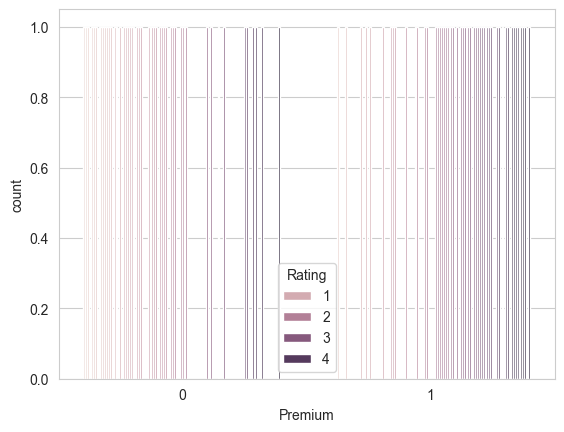

In [23]:
sns.countplot(x= 'Premium', hue = 'Rating', data = train)

<Axes: xlabel='Premium', ylabel='count'>

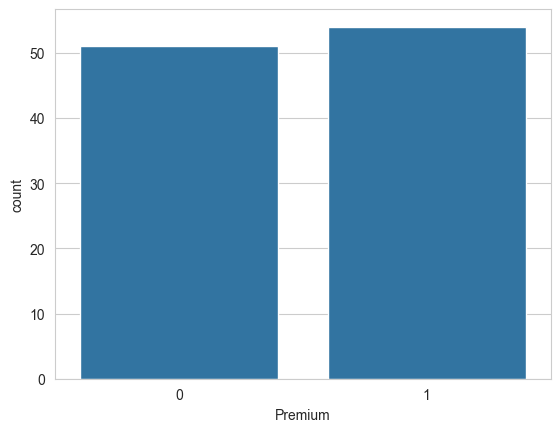

In [24]:
sns.countplot(x= 'Premium', data = train)

In [25]:
train["VendorSelection"]

0      1
1      0
2      0
3      1
4      1
      ..
100    0
101    0
102    1
103    1
104    0
Name: VendorSelection, Length: 105, dtype: int64

In [26]:
train.drop(['index','Categories'],axis = 1, inplace = True)

In [27]:
train

,Rating,VendorSelection,Prices,Premium
0,4.697128,1,10863.363367,1
1,0.844163,0,17839.488850,0
2,0.532776,0,36352.192471,0
3,0.848890,1,45040.495757,1
4,3.692233,1,10264.373904,1
...,...,...,...,...
100,0.401788,0,10777.195616,0
101,1.282128,0,2983.474816,0
102,1.641632,1,49116.131137,1
103,1.271520,1,10593.618131,0


In [28]:
X = train.drop('Premium', axis = 1)
y = train['Premium']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [33]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.56      1.00      0.72        18

    accuracy                           0.56        32
   macro avg       0.28      0.50      0.36        32
weighted avg       0.32      0.56      0.40        32



C:\Users\harshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harshit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 0, 14],
       [ 0, 18]], dtype=int64)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
predictions = dtree.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[13  1]
 [ 0 18]]


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32



In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)

In [46]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [47]:
rfc_pred = rfc.predict(X_test)

In [48]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[13  1]
 [ 0 18]]


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32



In [49]:

import ee
ee.Authenticate()
ee.Initialize(project = "ee-harshitsharma182021")



In [50]:
import geemap.core as geemap
import geemap

In [51]:
CitiesData = {
   "states":[
      {
         "state":"Andhra Pradesh",
         "districts":[
            "Anantapur",
            "Chittoor",
            "East Godavari",
            "Guntur",
            "Krishna",
            "Kurnool",
            "Nellore",
            "Prakasam",
            "Srikakulam",
            "Visakhapatnam",
            "Vizianagaram",
            "West Godavari",
            "YSR Kadapa"
         ]
      },
      {
         "state":"Arunachal Pradesh",
         "districts":[
            "Tawang",
            "West Kameng",
            "East Kameng",
            "Papum Pare",
            "Kurung Kumey",
            "Kra Daadi",
            "Lower Subansiri",
            "Upper Subansiri",
            "West Siang",
            "East Siang",
            "Siang",
            "Upper Siang",
            "Lower Siang",
            "Lower Dibang Valley",
            "Dibang Valley",
            "Anjaw",
            "Lohit",
            "Namsai",
            "Changlang",
            "Tirap",
            "Longding"
         ]
      },
      {
         "state":"Assam",
         "districts":[
            "Baksa",
            "Barpeta",
            "Biswanath",
            "Bongaigaon",
            "Cachar",
            "Charaideo",
            "Chirang",
            "Darrang",
            "Dhemaji",
            "Dhubri",
            "Dibrugarh",
            "Goalpara",
            "Golaghat",
            "Hailakandi",
            "Hojai",
            "Jorhat",
            "Kamrup Metropolitan",
            "Kamrup",
            "Karbi Anglong",
            "Karimganj",
            "Kokrajhar",
            "Lakhimpur",
            "Majuli",
            "Morigaon",
            "Nagaon",
            "Nalbari",
            "Dima Hasao",
            "Sivasagar",
            "Sonitpur",
            "South Salmara-Mankachar",
            "Tinsukia",
            "Udalguri",
            "West Karbi Anglong"
         ]
      },
      {
         "state":"Bihar",
         "districts":[
            "Araria",
            "Arwal",
            "Aurangabad",
            "Banka",
            "Begusarai",
            "Bhagalpur",
            "Bhojpur",
            "Buxar",
            "Darbhanga",
            "East Champaran (Motihari)",
            "Gaya",
            "Gopalganj",
            "Jamui",
            "Jehanabad",
            "Kaimur (Bhabua)",
            "Katihar",
            "Khagaria",
            "Kishanganj",
            "Lakhisarai",
            "Madhepura",
            "Madhubani",
            "Munger (Monghyr)",
            "Muzaffarpur",
            "Nalanda",
            "Nawada",
            "Patna",
            "Purnia (Purnea)",
            "Rohtas",
            "Saharsa",
            "Samastipur",
            "Saran",
            "Sheikhpura",
            "Sheohar",
            "Sitamarhi",
            "Siwan",
            "Supaul",
            "Vaishali",
            "West Champaran"
         ]
      },
      {
         "state":"Chandigarh (UT)",
         "districts":[
            "Chandigarh"
         ]
      },
      {
         "state":"Chhattisgarh",
         "districts":[
            "Balod",
            "Baloda Bazar",
            "Balrampur",
            "Bastar",
            "Bemetara",
            "Bijapur",
            "Bilaspur",
            "Dantewada (South Bastar)",
            "Dhamtari",
            "Durg",
            "Gariyaband",
            "Janjgir-Champa",
            "Jashpur",
            "Kabirdham (Kawardha)",
            "Kanker (North Bastar)",
            "Kondagaon",
            "Korba",
            "Korea (Koriya)",
            "Mahasamund",
            "Mungeli",
            "Narayanpur",
            "Raigarh",
            "Raipur",
            "Rajnandgaon",
            "Sukma",
            "Surajpur  ",
            "Surguja"
         ]
      },
      {
         "state":"Dadra and Nagar Haveli (UT)",
         "districts":[
            "Dadra & Nagar Haveli"
         ]
      },
      {
         "state":"Daman and Diu (UT)",
         "districts":[
            "Daman",
            "Diu"
         ]
      },
      {
         "state":"Delhi (NCT)",
         "districts":[
            "Central Delhi",
            "East Delhi",
            "New Delhi",
            "North Delhi",
            "North East  Delhi",
            "North West  Delhi",
            "Shahdara",
            "South Delhi",
            "South East Delhi",
            "South West  Delhi",
            "West Delhi"
         ]
      },
      {
         "state":"Goa",
         "districts":[
            "North Goa",
            "South Goa"
         ]
      },
      {
         "state":"Gujarat",
         "districts":[
            "Ahmedabad",
            "Amreli",
            "Anand",
            "Aravalli",
            "Banaskantha (Palanpur)",
            "Bharuch",
            "Bhavnagar",
            "Botad",
            "Chhota Udepur",
            "Dahod",
            "Dangs (Ahwa)",
            "Devbhoomi Dwarka",
            "Gandhinagar",
            "Gir Somnath",
            "Jamnagar",
            "Junagadh",
            "Kachchh",
            "Kheda (Nadiad)",
            "Mahisagar",
            "Mehsana",
            "Morbi",
            "Narmada (Rajpipla)",
            "Navsari",
            "Panchmahal (Godhra)",
            "Patan",
            "Porbandar",
            "Rajkot",
            "Sabarkantha (Himmatnagar)",
            "Surat",
            "Surendranagar",
            "Tapi (Vyara)",
            "Vadodara",
            "Valsad"
         ]
      },
      {
         "state":"Haryana",
         "districts":[
            "Ambala",
            "Bhiwani",
            "Charkhi Dadri",
            "Faridabad",
            "Fatehabad",
            "Gurgaon",
            "Hisar",
            "Jhajjar",
            "Jind",
            "Kaithal",
            "Karnal",
            "Kurukshetra",
            "Mahendragarh",
            "Mewat",
            "Palwal",
            "Panchkula",
            "Panipat",
            "Rewari",
            "Rohtak",
            "Sirsa",
            "Sonipat",
            "Yamunanagar"
         ]
      },
      {
         "state":"Himachal Pradesh",
         "districts":[
            "Bilaspur",
            "Chamba",
            "Hamirpur",
            "Kangra",
            "Kinnaur",
            "Kullu",
            "Lahaul &amp; Spiti",
            "Mandi",
            "Shimla",
            "Sirmaur (Sirmour)",
            "Solan",
            "Una"
         ]
      },
      {
         "state":"Jammu and Kashmir",
         "districts":[
            "Anantnag",
            "Bandipore",
            "Baramulla",
            "Budgam",
            "Doda",
            "Ganderbal",
            "Jammu",
            "Kargil",
            "Kathua",
            "Kishtwar",
            "Kulgam",
            "Kupwara",
            "Leh",
            "Poonch",
            "Pulwama",
            "Rajouri",
            "Ramban",
            "Reasi",
            "Samba",
            "Shopian",
            "Srinagar",
            "Udhampur"
         ]
      },
      {
         "state":"Jharkhand",
         "districts":[
            "Bokaro",
            "Chatra",
            "Deoghar",
            "Dhanbad",
            "Dumka",
            "East Singhbhum",
            "Garhwa",
            "Giridih",
            "Godda",
            "Gumla",
            "Hazaribag",
            "Jamtara",
            "Khunti",
            "Koderma",
            "Latehar",
            "Lohardaga",
            "Pakur",
            "Palamu",
            "Ramgarh",
            "Ranchi",
            "Sahibganj",
            "Seraikela-Kharsawan",
            "Simdega",
            "West Singhbhum"
         ]
      },
      {
         "state":"Karnataka",
         "districts":[
            "Bagalkot",
            "Ballari (Bellary)",
            "Belagavi (Belgaum)",
            "Bengaluru (Bangalore) Rural",
            "Bengaluru (Bangalore) Urban",
            "Bidar",
            "Chamarajanagar",
            "Chikballapur",
            "Chikkamagaluru (Chikmagalur)",
            "Chitradurga",
            "Dakshina Kannada",
            "Davangere",
            "Dharwad",
            "Gadag",
            "Hassan",
            "Haveri",
            "Kalaburagi (Gulbarga)",
            "Kodagu",
            "Kolar",
            "Koppal",
            "Mandya",
            "Mysuru (Mysore)",
            "Raichur",
            "Ramanagara",
            "Shivamogga (Shimoga)",
            "Tumakuru (Tumkur)",
            "Udupi",
            "Uttara Kannada (Karwar)",
            "Vijayapura (Bijapur)",
            "Yadgir"
         ]
      },
      {
         "state":"Kerala",
         "districts":[
            "Alappuzha",
            "Ernakulam",
            "Idukki",
            "Kannur",
            "Kasaragod",
            "Kollam",
            "Kottayam",
            "Kozhikode",
            "Malappuram",
            "Palakkad",
            "Pathanamthitta",
            "Thiruvananthapuram",
            "Thrissur",
            "Wayanad"
         ]
      },
      {
         "state":"Lakshadweep (UT)",
         "districts":[
            "Agatti",
            "Amini",
            "Androth",
            "Bithra",
            "Chethlath",
            "Kavaratti",
            "Kadmath",
            "Kalpeni",
            "Kilthan",
            "Minicoy"
         ]
      },
      {
         "state":"Madhya Pradesh",
         "districts":[
            "Agar Malwa",
            "Alirajpur",
            "Anuppur",
            "Ashoknagar",
            "Balaghat",
            "Barwani",
            "Betul",
            "Bhind",
            "Bhopal",
            "Burhanpur",
            "Chhatarpur",
            "Chhindwara",
            "Damoh",
            "Datia",
            "Dewas",
            "Dhar",
            "Dindori",
            "Guna",
            "Gwalior",
            "Harda",
            "Hoshangabad",
            "Indore",
            "Jabalpur",
            "Jhabua",
            "Katni",
            "Khandwa",
            "Khargone",
            "Mandla",
            "Mandsaur",
            "Morena",
            "Narsinghpur",
            "Neemuch",
            "Panna",
            "Raisen",
            "Rajgarh",
            "Ratlam",
            "Rewa",
            "Sagar",
            "Satna",
            "Sehore",
            "Seoni",
            "Shahdol",
            "Shajapur",
            "Sheopur",
            "Shivpuri",
            "Sidhi",
            "Singrauli",
            "Tikamgarh",
            "Ujjain",
            "Umaria",
            "Vidisha"
         ]
      },
      {
         "state":"Maharashtra",
         "districts":[
            "Ahmednagar",
            "Akola",
            "Amravati",
            "Aurangabad",
            "Beed",
            "Bhandara",
            "Buldhana",
            "Chandrapur",
            "Dhule",
            "Gadchiroli",
            "Gondia",
            "Hingoli",
            "Jalgaon",
            "Jalna",
            "Kolhapur",
            "Latur",
            "Mumbai City",
            "Mumbai Suburban",
            "Nagpur",
            "Nanded",
            "Nandurbar",
            "Nashik",
            "Osmanabad",
            "Palghar",
            "Parbhani",
            "Pune",
            "Raigad",
            "Ratnagiri",
            "Sangli",
            "Satara",
            "Sindhudurg",
            "Solapur",
            "Thane",
            "Wardha",
            "Washim",
            "Yavatmal"
         ]
      },
      {
         "state":"Manipur",
         "districts":[
            "Bishnupur",
            "Chandel",
            "Churachandpur",
            "Imphal East",
            "Imphal West",
            "Jiribam",
            "Kakching",
            "Kamjong",
            "Kangpokpi",
            "Noney",
            "Pherzawl",
            "Senapati",
            "Tamenglong",
            "Tengnoupal",
            "Thoubal",
            "Ukhrul"
         ]
      },
      {
         "state":"Meghalaya",
         "districts":[
            "East Garo Hills",
            "East Jaintia Hills",
            "East Khasi Hills",
            "North Garo Hills",
            "Ri Bhoi",
            "South Garo Hills",
            "South West Garo Hills ",
            "South West Khasi Hills",
            "West Garo Hills",
            "West Jaintia Hills",
            "West Khasi Hills"
         ]
      },
      {
         "state":"Mizoram",
         "districts":[
            "Aizawl",
            "Champhai",
            "Kolasib",
            "Lawngtlai",
            "Lunglei",
            "Mamit",
            "Saiha",
            "Serchhip"
         ]
      },
      {
         "state":"Nagaland",
         "districts":[
            "Dimapur",
            "Kiphire",
            "Kohima",
            "Longleng",
            "Mokokchung",
            "Mon",
            "Peren",
            "Phek",
            "Tuensang",
            "Wokha",
            "Zunheboto"
         ]
      },
      {
         "state":"Odisha",
         "districts":[
            "Angul",
            "Balangir",
            "Balasore",
            "Bargarh",
            "Bhadrak",
            "Boudh",
            "Cuttack",
            "Deogarh",
            "Dhenkanal",
            "Gajapati",
            "Ganjam",
            "Jagatsinghapur",
            "Jajpur",
            "Jharsuguda",
            "Kalahandi",
            "Kandhamal",
            "Kendrapara",
            "Kendujhar (Keonjhar)",
            "Khordha",
            "Koraput",
            "Malkangiri",
            "Mayurbhanj",
            "Nabarangpur",
            "Nayagarh",
            "Nuapada",
            "Puri",
            "Rayagada",
            "Sambalpur",
            "Sonepur",
            "Sundargarh"
         ]
      },
      {
         "state":"Puducherry (UT)",
         "districts":[
            "Karaikal",
            "Mahe",
            "Pondicherry",
            "Yanam"
         ]
      },
      {
         "state":"Punjab",
         "districts":[
            "Amritsar",
            "Barnala",
            "Bathinda",
            "Faridkot",
            "Fatehgarh Sahib",
            "Fazilka",
            "Ferozepur",
            "Gurdaspur",
            "Hoshiarpur",
            "Jalandhar",
            "Kapurthala",
            "Ludhiana",
            "Mansa",
            "Moga",
            "Muktsar",
            "Nawanshahr (Shahid Bhagat Singh Nagar)",
            "Pathankot",
            "Patiala",
            "Rupnagar",
            "Sahibzada Ajit Singh Nagar (Mohali)",
            "Sangrur",
            "Tarn Taran"
         ]
      },
      {
         "state":"Rajasthan",
         "districts":[
            "Ajmer",
            "Alwar",
            "Banswara",
            "Baran",
            "Barmer",
            "Bharatpur",
            "Bhilwara",
            "Bikaner",
            "Bundi",
            "Chittorgarh",
            "Churu",
            "Dausa",
            "Dholpur",
            "Dungarpur",
            "Hanumangarh",
            "Jaipur",
            "Jaisalmer",
            "Jalore",
            "Jhalawar",
            "Jhunjhunu",
            "Jodhpur",
            "Karauli",
            "Kota",
            "Nagaur",
            "Pali",
            "Pratapgarh",
            "Rajsamand",
            "Sawai Madhopur",
            "Sikar",
            "Sirohi",
            "Sri Ganganagar",
            "Tonk",
            "Udaipur"
         ]
      },
      {
         "state":"Sikkim",
         "districts":[
            "East Sikkim",
            "North Sikkim",
            "South Sikkim",
            "West Sikkim"
         ]
      },
      {
         "state":"Tamil Nadu",
         "districts":[
            "Ariyalur",
            "Chennai",
            "Coimbatore",
            "Cuddalore",
            "Dharmapuri",
            "Dindigul",
            "Erode",
            "Kanchipuram",
            "Kanyakumari",
            "Karur",
            "Krishnagiri",
            "Madurai",
            "Nagapattinam",
            "Namakkal",
            "Nilgiris",
            "Perambalur",
            "Pudukkottai",
            "Ramanathapuram",
            "Salem",
            "Sivaganga",
            "Thanjavur",
            "Theni",
            "Thoothukudi (Tuticorin)",
            "Tiruchirappalli",
            "Tirunelveli",
            "Tiruppur",
            "Tiruvallur",
            "Tiruvannamalai",
            "Tiruvarur",
            "Vellore",
            "Viluppuram",
            "Virudhunagar"
         ]
      },
      {
         "state":"Telangana",
         "districts":[
            "Adilabad",
            "Bhadradri Kothagudem",
            "Hyderabad",
            "Jagtial",
            "Jangaon",
            "Jayashankar Bhoopalpally",
            "Jogulamba Gadwal",
            "Kamareddy",
            "Karimnagar",
            "Khammam",
            "Komaram Bheem Asifabad",
            "Mahabubabad",
            "Mahabubnagar",
            "Mancherial",
            "Medak",
            "Medchal",
            "Nagarkurnool",
            "Nalgonda",
            "Nirmal",
            "Nizamabad",
            "Peddapalli",
            "Rajanna Sircilla",
            "Rangareddy",
            "Sangareddy",
            "Siddipet",
            "Suryapet",
            "Vikarabad",
            "Wanaparthy",
            "Warangal (Rural)",
            "Warangal (Urban)",
            "Yadadri Bhuvanagiri"
         ]
      },
      {
         "state":"Tripura",
         "districts":[
            "Dhalai",
            "Gomati",
            "Khowai",
            "North Tripura",
            "Sepahijala",
            "South Tripura",
            "Unakoti",
            "West Tripura"
         ]
      },
      {
         "state":"Uttarakhand",
         "districts":[
            "Almora",
            "Bageshwar",
            "Chamoli",
            "Champawat",
            "Dehradun",
            "Haridwar",
            "Nainital",
            "Pauri Garhwal",
            "Pithoragarh",
            "Rudraprayag",
            "Tehri Garhwal",
            "Udham Singh Nagar",
            "Uttarkashi"
         ]
      },
      {
         "state":"Uttar Pradesh",
         "districts":[
            "Agra",
            "Aligarh",
            "Allahabad",
            "Ambedkar Nagar",
            "Amethi (Chatrapati Sahuji Mahraj Nagar)",
            "Amroha (J.P. Nagar)",
            "Auraiya",
            "Azamgarh",
            "Baghpat",
            "Bahraich",
            "Ballia",
            "Balrampur",
            "Banda",
            "Barabanki",
            "Bareilly",
            "Basti",
            "Bhadohi",
            "Bijnor",
            "Budaun",
            "Bulandshahr",
            "Chandauli",
            "Chitrakoot",
            "Deoria",
            "Etah",
            "Etawah",
            "Faizabad",
            "Farrukhabad",
            "Fatehpur",
            "Firozabad",
            "Gautam Buddha Nagar",
            "Ghaziabad",
            "Ghazipur",
            "Gonda",
            "Gorakhpur",
            "Hamirpur",
            "Hapur (Panchsheel Nagar)",
            "Hardoi",
            "Hathras",
            "Jalaun",
            "Jaunpur",
            "Jhansi",
            "Kannauj",
            "Kanpur Dehat",
            "Kanpur Nagar",
            "Kanshiram Nagar (Kasganj)",
            "Kaushambi",
            "Kushinagar (Padrauna)",
            "Lakhimpur - Kheri",
            "Lalitpur",
            "Lucknow",
            "Maharajganj",
            "Mahoba",
            "Mainpuri",
            "Mathura",
            "Mau",
            "Meerut",
            "Mirzapur",
            "Moradabad",
            "Muzaffarnagar",
            "Pilibhit",
            "Pratapgarh",
            "RaeBareli",
            "Rampur",
            "Saharanpur",
            "Sambhal (Bhim Nagar)",
            "Sant Kabir Nagar",
            "Shahjahanpur",
            "Shamali (Prabuddh Nagar)",
            "Shravasti",
            "Siddharth Nagar",
            "Sitapur",
            "Sonbhadra",
            "Sultanpur",
            "Unnao",
            "Varanasi"
         ]
      },
      {
         "state":"West Bengal",
         "districts":[
            "Alipurduar",
            "Bankura",
            "Birbhum",
            "Burdwan (Bardhaman)",
            "Cooch Behar",
            "Dakshin Dinajpur (South Dinajpur)",
            "Darjeeling",
            "Hooghly",
            "Howrah",
            "Jalpaiguri",
            "Kalimpong",
            "Kolkata",
            "Malda",
            "Murshidabad",
            "Nadia",
            "North 24 Parganas",
            "Paschim Medinipur (West Medinipur)",
            "Purba Medinipur (East Medinipur)",
            "Purulia",
            "South 24 Parganas",
            "Uttar Dinajpur (North Dinajpur)"
         ]
      }
   ]
}

districtName = []
for i in CitiesData['states']:
  for j in i['districts']:
    districtName.append(j)
CitywiseCategorySearches = []
for i in range(len(Categorywise)):
    toAppend = []
    for i in range(len(districtName)):
        toAppend.append(math.floor(random.random() * 1000))
    CitywiseCategorySearches.append(toAppend)


In [52]:
CitywiseCategorySearches

[[812,
  271,
  257,
  449,
  871,
  771,
  764,
  123,
  638,
  726,
  70,
  93,
  745,
  402,
  177,
  741,
  853,
  946,
  133,
  606,
  894,
  94,
  968,
  795,
  564,
  55,
  902,
  164,
  569,
  786,
  731,
  280,
  160,
  231,
  984,
  679,
  733,
  709,
  244,
  478,
  724,
  18,
  858,
  371,
  98,
  112,
  245,
  566,
  263,
  95,
  334,
  577,
  484,
  443,
  148,
  589,
  773,
  240,
  839,
  309,
  987,
  790,
  503,
  726,
  932,
  95,
  266,
  892,
  292,
  562,
  110,
  279,
  285,
  983,
  177,
  166,
  601,
  103,
  654,
  197,
  572,
  616,
  889,
  742,
  237,
  903,
  998,
  534,
  21,
  234,
  45,
  720,
  339,
  3,
  125,
  102,
  335,
  766,
  893,
  856,
  130,
  683,
  46,
  833,
  669,
  836,
  748,
  918,
  94,
  204,
  157,
  158,
  449,
  573,
  945,
  487,
  437,
  90,
  594,
  338,
  582,
  573,
  165,
  412,
  813,
  277,
  924,
  66,
  579,
  69,
  627,
  450,
  672,
  279,
  273,
  979,
  591,
  45,
  783,
  194,
  622,
  616,
  133,
  596,
  454,
  8

In [53]:
m = geemap.Map()
city = (
      ee.FeatureCollection('FAO/GAUL_SIMPLIFIED_500m/2015/level2')
      .filter("ADM2_NAME == '{}'".format('Delhi'))
      .filter(ee.Filter.eq('ADM2_NAME', '{}'.format('Delhi')))  # Exactly the same as above.
    )
m.center_object(city, 9)
m.get_center()

[28.64654955564474, 77.10895454636062]

In [54]:
for i in districtName[:10]:
    city = (
      ee.FeatureCollection('FAO/GAUL_SIMPLIFIED_500m/2015/level2')
      .filter("ADM2_NAME == '{}'".format(i))
      .filter(ee.Filter.eq('ADM2_NAME', '{}'.format(i)))  # Exactly the same as above.
    )
    x = districtName.index(i)
    val = str(0000 + CitywiseCategorySearches[0][x])
    num = len(val)
    while num<4:
        val = val + '0'
        num+=1
    try:
        m.addLayer(city, {'color': 'FF{}'.format(val)}, i)
    except:
        continue

In [55]:
m

Map(center=[28.64654955564474, 77.10895454636062], controls=(WidgetControl(options=['position', 'transparent_b…